In [1]:
!pip install tensorflow
!pip install -q pandas scikit-learn matplotlib
!pip install -q transformers datasets accelerate evaluate torch scikit-learn
!pip install -q lightgbm joblib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 871.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19

In [2]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


TensorFlow version: 2.20.0


In [3]:
!gdown 1uBb-xyo3jiuMbWAreRm0JGLUfxLN2Ykb


Downloading...
From: https://drive.google.com/uc?id=1uBb-xyo3jiuMbWAreRm0JGLUfxLN2Ykb
To: /content/data_gojek_preprocessed_sentiment.csv
100% 69.9M/69.9M [00:00<00:00, 85.6MB/s]


In [ ]:
# =====================================
# PEMISAHAN DATA
# =====================================
import pandas as pd
from sklearn.model_selection import train_test_split


input_csv_path = '/content/data_gojek_preprocessed_sentiment.csv' 
output_train_path = '/content/data_train_split.csv'
output_val_path = '/content/data_val_split.csv'
output_test_path = '/content/data_test_split.csv'


try:
    df_original = pd.read_csv(input_csv_path)
    print(f"✅ Data loaded from {input_csv_path}")
    print(f"Original data size: {len(df_original)}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {input_csv_path}")
    exit()


df_train, df_temp = train_test_split(df_original, test_size=0.2, random_state=42, stratify=df_original['label'] if 'label' in df_original.columns else None)

df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['label'] if 'label' in df_temp.columns else None)

print(f"\n✅ Data split successfully!")
print(f"Train size: {len(df_train)}")
print(f"Validation size: {len(df_val)}")
print(f"Test size: {len(df_test)}")

df_train.to_csv(output_train_path, index=False)
df_val.to_csv(output_val_path, index=False)
df_test.to_csv(output_test_path, index=False)

print(f"\n✅ Split data saved to:")
print(f"- Train: {output_train_path}")
print(f"- Validation: {output_val_path}")
print(f"- Test: {output_test_path}")

✅ Data loaded from /content/data_gojek_preprocessed_sentiment.csv
Original data size: 100000

✅ Data split successfully!
Train size: 80000
Validation size: 10000
Test size: 10000

✅ Split data saved to:
- Train: /content/data_train_split.csv
- Validation: /content/data_val_split.csv
- Test: /content/data_test_split.csv


#CNN

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# =====================================
# LOAD DATA
# =====================================
train_df = pd.read_csv('/content/data_train_split.csv')
val_df = pd.read_csv('/content/data_val_split.csv')
test_df = pd.read_csv('/content/data_test_split.csv')

print("✅ Data loaded successfully!")
print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

✅ Data loaded successfully!
Train: 80000 | Val: 10000 | Test: 10000


In [ ]:
# =====================================
# Penggabungan Train dan Val
# =====================================


print(f"Kolom di Train DF: {train_df.columns}")
print(f"Kolom di Val DF: {val_df.columns}")



texts = pd.concat([train_df['final_text'], val_df['final_text']])
labels = pd.concat([train_df['predicted_sentiment_label'], val_df['predicted_sentiment_label']])


texts = texts.fillna('').astype(str)

print(f"✅ Data siap. Jumlah teks: {len(texts)}, Jumlah label: {len(labels)}")

Kolom di Train DF: Index(['content', 'score', 'text_lower', 'text_clean', 'text_token',
       'text_norm', 'text_nostop', 'text_stem', 'final_text',
       'reviewCreatedVersion', 'at', 'appVersion',
       'predicted_sentiment_label'],
      dtype='object')
Kolom di Val DF: Index(['content', 'score', 'text_lower', 'text_clean', 'text_token',
       'text_norm', 'text_nostop', 'text_stem', 'final_text',
       'reviewCreatedVersion', 'at', 'appVersion',
       'predicted_sentiment_label'],
      dtype='object')
✅ Data siap. Jumlah teks: 90000, Jumlah label: 90000


In [ ]:
# =====================================
# TOKENISASI DAN PADDING
# =====================================
max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
final_text_padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

print(f"✅ Data tokenized & padded. Shape: {final_text_padded.shape}")

✅ Data tokenized & padded. Shape: (90000, 200)


In [ ]:
# =====================================
# FUNGSI MODEL CNN
# =====================================
def create_textcnn(max_words=20000, max_len=200, embedding_dim=128):
    model = models.Sequential([
        layers.Embedding(max_words, embedding_dim, input_length=max_len),
        layers.Conv1D(128, 3, activation='relu'),
        layers.GlobalMaxPooling1D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
import numpy as np

# =====================
# CROSS VALIDATION
# =====================
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_histories = []

X = np.array(final_text_padded)
y = np.array(labels)

best_model = None
best_acc = 0.0  
fold = 1

for train_idx, val_idx in kf.split(X, y):
    print(f"\n🔹 Fold {fold} dimulai...")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

  
    callback_earlystop = EarlyStopping(
        monitor='val_loss',
        mode='min',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )

 
    with strategy.scope():
        model = create_textcnn()
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

   
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=25,
        batch_size=512,
        verbose=1,
        callbacks=[callback_earlystop]
    )

   
    best_epoch = np.argmin(history.history['val_loss'])
    val_acc = history.history['val_accuracy'][best_epoch]

    fold_accuracies.append(val_acc)
    fold_histories.append(history.history)

    print(f"✅ Fold {fold} berhenti di epoch {best_epoch + 1}. Akurasi validasi terbaik: {val_acc:.4f}")

 
    if val_acc > best_acc:
        best_acc = val_acc
        best_model = model 

    fold += 1


# =====================================
# HASIL RATA-RATA K-FOLD
# =====================================
avg_acc = np.mean(fold_accuracies)
print("\n📊 Hasil 5-Fold Cross Validation (dengan Early Stopping):")
for i, acc in enumerate(fold_accuracies, 1):
    print(f"Fold {i}: {acc:.4f}")
print(f"\n💯 Rata-rata akurasi validasi: {avg_acc:.4f}")
print(f"🏆 Model terbaik berasal dari fold dengan val_acc={best_acc:.4f}")



🔹 Fold 1 dimulai...
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


141/141 ━━━━━━━━━━━━━━━━━━━━ 57s 397ms/step - accuracy: 0.8193 - loss: 0.4137 - val_accuracy: 0.9350 - val_loss: 0.1608
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 56s 394ms/step - accuracy: 0.9493 - loss: 0.1350 - val_accuracy: 0.9428 - val_loss: 0.1475
Epoch 3/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 56s 396ms/step - accuracy: 0.9639 - loss: 0.1020 - val_accuracy: 0.9419 - val_loss: 0.1552
Epoch 4/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 56s 394ms/step - accuracy: 0.9732 - loss: 0.0771 - val_accuracy: 0.9397 - val_loss: 0.1601
Epoch 5/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 56s 394ms/step - accuracy: 0.9811 - loss: 0.0563 - val_accuracy: 0.9368 - val_loss: 0.1845
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
✅ Fold 1 berhenti di epoch 2. Akurasi validasi terbaik: 0.9428

🔹 Fold 2 dimulai...
Epoch 1/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 57s 396ms/step - accuracy: 0.8048 - loss: 0.4185 - val_accuracy: 0.9352 - val_loss: 0.1634
Epoch 2/25
141/141 ━━━━━━━━━━━━━━━━━━━━ 56s 395ms/step - a

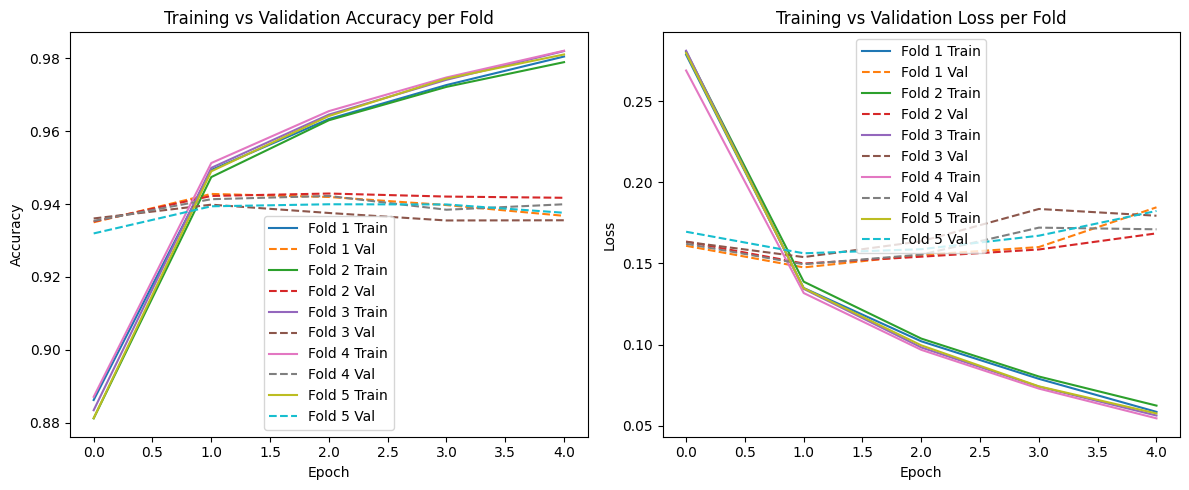

In [ ]:
# =====================================
# VISUALISASI AKURASI & LOSS
# =====================================
plt.figure(figsize=(12,5))

# Akurasi
plt.subplot(1,2,1)
for i, hist in enumerate(fold_histories, 1):
    plt.plot(hist['accuracy'], label=f'Fold {i} Train')
    plt.plot(hist['val_accuracy'], linestyle='--', label=f'Fold {i} Val')
plt.title('Training vs Validation Accuracy per Fold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
for i, hist in enumerate(fold_histories, 1):
    plt.plot(hist['loss'], label=f'Fold {i} Train')
    plt.plot(hist['val_loss'], linestyle='--', label=f'Fold {i} Val')
plt.title('Training vs Validation Loss per Fold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# =====================================
# EVALUASI MODEL TERBAIK DI DATA TEST
# =====================================
test_df['final_text'] = test_df['final_text'].astype(str).fillna("")


test_seq = tokenizer.texts_to_sequences(test_df['final_text'])
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')


test_pad_tensor = tf.constant(test_pad)
test_labels_tensor = tf.constant(test_df['predicted_sentiment_label'].values)


with strategy.scope():
    if not best_model.optimizer:
         best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    test_loss, test_acc = best_model.evaluate(test_pad_tensor, test_labels_tensor)

print(f"\n🎯 Akurasi model terbaik pada data test: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9405 - loss: 0.1516

🎯 Akurasi model terbaik pada data test: 0.9417



Generating confusion matrix and ROC curve for the best CNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


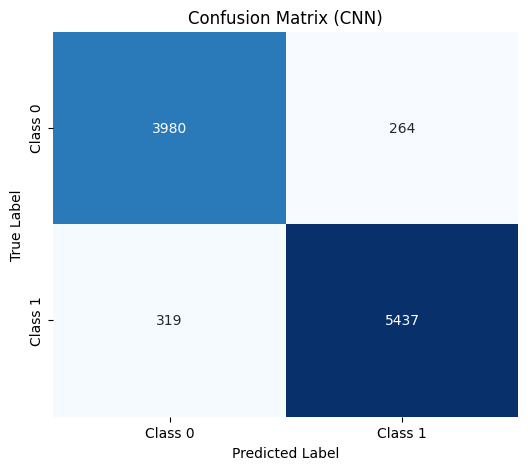

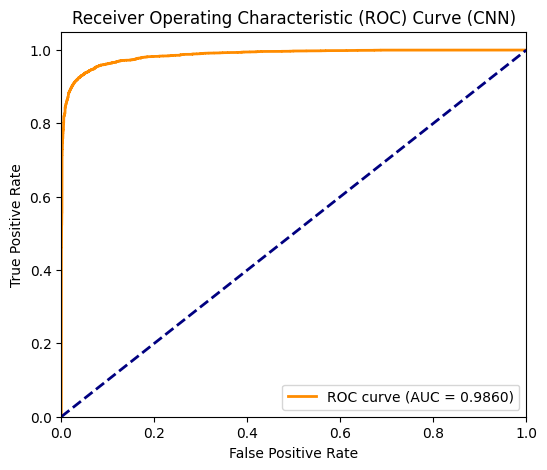

In [22]:
# =====================================
# VISUALISASI HASIL EVALUASI (CNN)
# =====================================
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


if 'best_model' in locals() and 'test_pad_tensor' in locals() and 'test_labels_tensor' in locals():
    print("\nGenerating confusion matrix and ROC curve for the best CNN model...")

    # Get predictions and probabilities
    y_pred_proba_cnn = best_model.predict(test_pad_tensor).flatten()
    y_pred_cnn = (y_pred_proba_cnn >= 0.5).astype(int)
    y_true_cnn = test_labels_tensor.numpy()

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_true_cnn, y_pred_cnn)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (CNN)')
    plt.show()

    # --- ROC Curve and AUC ---
    fpr, tpr, thresholds = roc_curve(y_true_cnn, y_pred_proba_cnn)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (CNN)')
    plt.legend(loc="lower right")
    plt.show()

else:
    print("❗ Could not generate visualizations. Ensure 'best_model', 'test_pad_tensor', and 'test_labels_tensor' are available.")

#BiLSTM

In [23]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

In [26]:
TRAIN_CSV = "/content/data_train_split.csv"
VAL_CSV   = "/content/data_val_split.csv"
TEST_CSV  = "/content/data_test_split.csv"
TEXT_COL = 'final_text'
LABEL_COL = 'predicted_sentiment_label'
NUM_WORDS  = 40000
MAXLEN     = 128
EMBED_DIM  = 128
BATCH_SIZE = 128
EPOCHS     = 6
CHECKPOINT_PATH = "/content/bilstm_best.h5"

In [27]:
def load_and_encode(path):
    df = pd.read_csv(path)
    if TEXT_COL not in df.columns or LABEL_COL not in df.columns:
        raise ValueError(f"CSV harus punya kolom '{TEXT_COL}' dan '{LABEL_COL}'")
    X = df[TEXT_COL].astype(str).tolist()
    y_raw = df[LABEL_COL].tolist()
    if isinstance(y_raw[0], str):
        le = LabelEncoder()
        y = le.fit_transform(y_raw)
    else:
        y = np.array(y_raw).astype(int)
    return X, y

print("Loading data...")
X_train_texts, y_train = load_and_encode(TRAIN_CSV)
X_val_texts, y_val = load_and_encode(VAL_CSV)
X_test_texts, y_test = load_and_encode(TEST_CSV)
print("Sizes:", len(X_train_texts), len(X_val_texts), len(X_test_texts))

Loading data...
Sizes: 80000 10000 10000


In [28]:
# Tokenize
tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_texts)
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_val_seq = tokenizer.texts_to_sequences(X_val_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)
X_train = pad_sequences(X_train_seq, maxlen=MAXLEN, padding='post', truncating='post')
X_val   = pad_sequences(X_val_seq, maxlen=MAXLEN, padding='post', truncating='post')
X_test  = pad_sequences(X_test_seq, maxlen=MAXLEN, padding='post', truncating='post')
vocab_size = min(NUM_WORDS, len(tokenizer.word_index) + 1)
print("Vocab size:", vocab_size)

Vocab size: 27793


In [29]:
# Build model
def build_bilstm(vocab_size, maxlen, embedding_dim=128):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
        Bidirectional(LSTM(128, return_sequences=True)),
        GlobalMaxPool1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_bilstm(vocab_size=vocab_size, maxlen=MAXLEN, embedding_dim=EMBED_DIM)
model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
    ModelCheckpoint(CHECKPOINT_PATH, save_best_only=True, monitor='val_loss')
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.8594 - loss: 0.3011

625/625 ━━━━━━━━━━━━━━━━━━━━ 309s 490ms/step - accuracy: 0.8595 - loss: 0.3010 - val_accuracy: 0.9407 - val_loss: 0.1516 - learning_rate: 0.0010
Epoch 2/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 489ms/step - accuracy: 0.9536 - loss: 0.1212 - val_accuracy: 0.9386 - val_loss: 0.1547 - learning_rate: 0.0010
Epoch 3/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 489ms/step - accuracy: 0.9635 - loss: 0.0941 - val_accuracy: 0.9366 - val_loss: 0.1606 - learning_rate: 0.0010
Epoch 4/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 282s 451ms/step - accuracy: 0.9718 - loss: 0.0742 - val_accuracy: 0.9383 - val_loss: 0.1747 - learning_rate: 5.0000e-04


In [30]:
# save tokenizer for later
import pickle
with open("/content/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

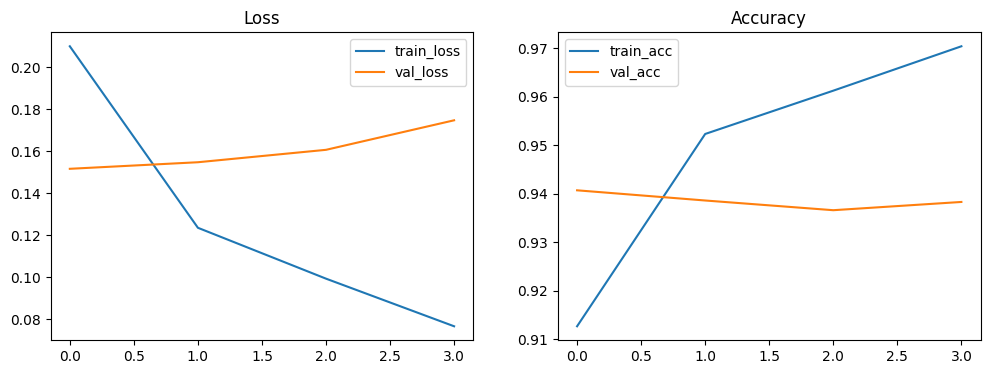

In [31]:
# Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(history.history['loss'], label='train_loss'); plt.plot(history.history['val_loss'], label='val_loss'); plt.legend(); plt.title("Loss")
plt.subplot(1,2,2); plt.plot(history.history['accuracy'], label='train_acc'); plt.plot(history.history['val_accuracy'], label='val_acc'); plt.legend(); plt.title("Accuracy")
plt.show()

In [32]:
# Evaluate on test
print("Loading best model and evaluating on test...")
best = load_model(CHECKPOINT_PATH)
preds = best.predict(X_test, batch_size=256).flatten()
y_pred = (preds >= 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

Loading best model and evaluating on test...
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step
Accuracy: 0.9391
Precision: 0.9510955302366345
Recall: 0.9426685198054204
F1: 0.9468632754558939
Confusion matrix:
 [[3965  279]
 [ 330 5426]]
Classification report:
               precision    recall  f1-score   support

           0     0.9232    0.9343    0.9287      4244
           1     0.9511    0.9427    0.9469      5756

    accuracy                         0.9391     10000
   macro avg     0.9371    0.9385    0.9378     10000
weighted avg     0.9392    0.9391    0.9391     10000




Generating confusion matrix and ROC curve for the BiLSTM model...


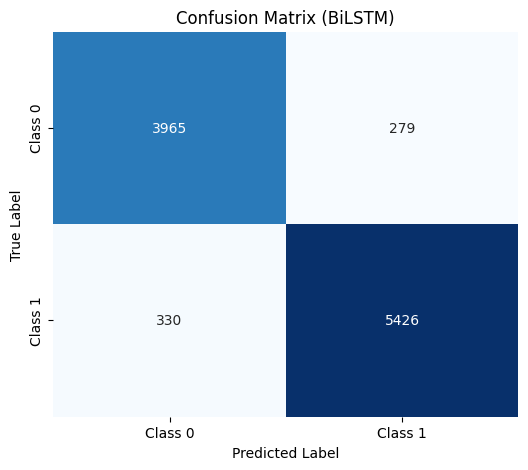

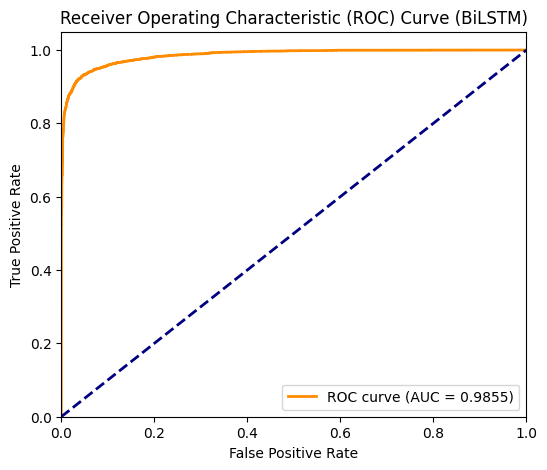

In [33]:
# =====================================
# VISUALISASI HASIL EVALUASI (BiLSTM)
# =====================================
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

if 'y_pred' in locals() and 'preds' in locals() and 'y_test' in locals():
    print("\nGenerating confusion matrix and ROC curve for the BiLSTM model...")

    # --- Confusion Matrix ---
    cm_bilstm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_bilstm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (BiLSTM)')
    plt.show()

    # --- ROC Curve and AUC ---
    fpr_bilstm, tpr_bilstm, thresholds_bilstm = roc_curve(y_test, preds)
    roc_auc_bilstm = auc(fpr_bilstm, tpr_bilstm)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr_bilstm, tpr_bilstm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_bilstm:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (BiLSTM)')
    plt.legend(loc="lower right")
    plt.show()

else:
    print("❗ Could not generate visualizations. Ensure 'y_pred', 'preds', and 'y_test' are available from the previous cell.")

#LightGBM

In [34]:
import os, time, json, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import lightgbm as lgb

In [ ]:
PATH_TRAIN_CSV = "/content/data_train_split.csv"
PATH_TEST_CSV  = "/content/data_test_split.csv"

OUTPUT_DIR = "/content/lgbm_pipeline_output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# TF-IDF params
TFIDF_max_features = 50000   
TFIDF_ngram_range = (1,2)

# CV params
N_SPLITS = 5
RANDOM_STATE = 42
SHUFFLE = True

# LightGBM training params (sensible defaults)
LGB_PARAMS = {
    "n_estimators": 2000,
    "learning_rate": 0.05,
    "num_leaves": 64,
    "max_depth": -1,
    "min_child_samples": 20,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "reg_alpha": 0.0,
    "reg_lambda": 1.0,
    "random_state": RANDOM_STATE,
    "n_jobs": -1,
    "verbosity": -1
}

EARLY_STOPPING_ROUNDS = 50
VERBOSE = 100
TOP_K_FEATURES = 50  

In [38]:
def load_csv(path):
    print("Loading:", path)
    df = pd.read_csv(path)


    if "final_text" not in df.columns or "predicted_sentiment_label" not in df.columns:
        raise ValueError("CSV must contain 'final_text' and 'predicted_sentiment_label' columns")

    return df

def encode_labels(y):
    if y.dtype == object or y.dtype == 'O':
        le = LabelEncoder()
        y_enc = le.fit_transform(y)
        return y_enc, le
    else:
        return y.to_numpy().astype(int), None

# Load data
df_train = load_csv(PATH_TRAIN_CSV)
df_test  = load_csv(PATH_TEST_CSV)


train_texts = df_train["final_text"].astype(str).tolist()
train_labels_raw = df_train["predicted_sentiment_label"]
test_texts = df_test["final_text"].astype(str).tolist()
test_labels_raw = df_test["predicted_sentiment_label"]


# Encode labels
y_train, label_encoder = encode_labels(train_labels_raw)
y_test, _ = encode_labels(test_labels_raw)

if label_encoder is not None:
    with open(os.path.join(OUTPUT_DIR, "label_classes.json"), "w", encoding="utf-8") as f:
        json.dump(list(label_encoder.classes_), f, ensure_ascii=False)

print("Train size:", len(train_texts), "Test size:", len(test_texts))
print("Unique labels:", np.unique(y_train))

Loading: /content/data_train_split.csv
Loading: /content/data_test_split.csv
Train size: 80000 Test size: 10000
Unique labels: [0 1]


In [ ]:
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=SHUFFLE, random_state=RANDOM_STATE)
fold_results = []


for fold, (train_idx, val_idx) in enumerate(skf.split(train_texts, y_train), 1):
    print(f"\n=== FOLD {fold}/{N_SPLITS} ===")
    X_tr_texts = [train_texts[i] for i in train_idx]
    X_va_texts = [train_texts[i] for i in val_idx]
    y_tr = y_train[train_idx]
    y_va = y_train[val_idx]

  
    vect = TfidfVectorizer(max_features=TFIDF_max_features, ngram_range=TFIDF_ngram_range)
    vect.fit(X_tr_texts)
    X_tr = vect.transform(X_tr_texts)  
    X_va = vect.transform(X_va_texts)

    clf = lgb.LGBMClassifier(**LGB_PARAMS)

  
    print("Training LightGBM for fold", fold)
    early_stopping_callback = lgb.early_stopping(EARLY_STOPPING_ROUNDS, verbose=VERBOSE)
    clf.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        callbacks=[early_stopping_callback]
    )

  
    y_va_pred = clf.predict(X_va)
    y_va_proba = clf.predict_proba(X_va)[:, 1] if clf.predict_proba(X_va).shape[1] > 1 else clf.predict_proba(X_va)[:, 0]

    acc = accuracy_score(y_va, y_va_pred)
    prec = precision_score(y_va, y_va_pred, zero_division=0)
    rec = recall_score(y_va, y_va_pred, zero_division=0)
    f1 = f1_score(y_va, y_va_pred, zero_division=0)
    try:
        auc = roc_auc_score(y_va, y_va_proba)
    except Exception:
        auc = np.nan

    print(f"Fold {fold} -> Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
    fold_results.append({
        "fold": fold,
        "acc": acc, "precision": prec, "recall": rec, "f1": f1, "auc": auc
    })

    
    model_path = os.path.join(OUTPUT_DIR, f"lgbm_fold_{fold}.joblib")
    vect_path = os.path.join(OUTPUT_DIR, f"tfidf_fold_{fold}.joblib")
    joblib.dump(clf, model_path)
    joblib.dump(vect, vect_path)
    print("Saved fold model to", model_path)
    print("Saved fold TF-IDF to", vect_path)


=== FOLD 1/5 ===
Training LightGBM for fold 1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[999]	valid_0's binary_logloss: 0.156024


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1 -> Acc: 0.9368, Prec: 0.9471, Rec: 0.9429, F1: 0.9450, AUC: 0.9849
Saved fold model to /content/lgbm_pipeline_output/lgbm_fold_1.joblib
Saved fold TF-IDF to /content/lgbm_pipeline_output/tfidf_fold_1.joblib

=== FOLD 2/5 ===
Training LightGBM for fold 2
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1482]	valid_0's binary_logloss: 0.15234


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2 -> Acc: 0.9421, Prec: 0.9525, Rec: 0.9467, F1: 0.9496, AUC: 0.9855
Saved fold model to /content/lgbm_pipeline_output/lgbm_fold_2.joblib
Saved fold TF-IDF to /content/lgbm_pipeline_output/tfidf_fold_2.joblib

=== FOLD 3/5 ===
Training LightGBM for fold 3
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1173]	valid_0's binary_logloss: 0.149449


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3 -> Acc: 0.9438, Prec: 0.9523, Rec: 0.9499, F1: 0.9511, AUC: 0.9859
Saved fold model to /content/lgbm_pipeline_output/lgbm_fold_3.joblib
Saved fold TF-IDF to /content/lgbm_pipeline_output/tfidf_fold_3.joblib

=== FOLD 4/5 ===
Training LightGBM for fold 4
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1197]	valid_0's binary_logloss: 0.155272


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 4 -> Acc: 0.9392, Prec: 0.9498, Rec: 0.9443, F1: 0.9470, AUC: 0.9850
Saved fold model to /content/lgbm_pipeline_output/lgbm_fold_4.joblib
Saved fold TF-IDF to /content/lgbm_pipeline_output/tfidf_fold_4.joblib

=== FOLD 5/5 ===
Training LightGBM for fold 5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1054]	valid_0's binary_logloss: 0.149318


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 5 -> Acc: 0.9425, Prec: 0.9530, Rec: 0.9468, F1: 0.9499, AUC: 0.9859
Saved fold model to /content/lgbm_pipeline_output/lgbm_fold_5.joblib
Saved fold TF-IDF to /content/lgbm_pipeline_output/tfidf_fold_5.joblib


In [40]:
# Save CV summary
cv_df = pd.DataFrame(fold_results)
cv_df.loc["mean"] = cv_df.mean(numeric_only=True)
cv_csv = os.path.join(OUTPUT_DIR, "cv_results.csv")
cv_df.to_csv(cv_csv, index=False)
print("\nCross-validation results saved to", cv_csv)
print(cv_df)


Cross-validation results saved to /content/lgbm_pipeline_output/cv_results.csv
      fold       acc  precision    recall        f1       auc
0      1.0  0.936813   0.947099  0.942882  0.944986  0.984865
1      2.0  0.942125   0.952475  0.946683  0.949570  0.985481
2      3.0  0.943813   0.952319  0.949940  0.951128  0.985943
3      4.0  0.939187   0.949754  0.944288  0.947013  0.984984
4      5.0  0.942500   0.952995  0.946785  0.949880  0.985853
mean   3.0  0.940887   0.950928  0.946116  0.948515  0.985425


In [ ]:
print("\nTraining final model on full training set and evaluating on test set...")
final_vectorizer = TfidfVectorizer(max_features=TFIDF_max_features, ngram_range=TFIDF_ngram_range)
final_vectorizer.fit(train_texts)
X_train_full = final_vectorizer.transform(train_texts)
X_test_vec = final_vectorizer.transform(test_texts)

final_clf = lgb.LGBMClassifier(**LGB_PARAMS)
print("Fitting final model (no early stopping)...")
final_clf.fit(X_train_full, y_train)


y_test_pred = final_clf.predict(X_test_vec)
y_test_proba = final_clf.predict_proba(X_test_vec)[:, 1] if final_clf.predict_proba(X_test_vec).shape[1] > 1 else final_clf.predict_proba(X_test_vec)[:, 0]

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, zero_division=0)
test_rec = recall_score(y_test, y_test_pred, zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
try:
    test_auc = roc_auc_score(y_test, y_test_proba)
except Exception:
    test_auc = np.nan

print(f"Test -> Acc: {test_acc:.4f}, Prec: {test_prec:.4f}, Rec: {test_rec:.4f}, F1: {test_f1:.4f}, AUC: {test_auc:.4f}")
print("\nClassification report on test:\n", classification_report(y_test, y_test_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_test_pred))


final_model_path = os.path.join(OUTPUT_DIR, "lgbm_final.joblib")
final_vect_path = os.path.join(OUTPUT_DIR, "tfidf_final.joblib")
joblib.dump(final_clf, final_model_path)
joblib.dump(final_vectorizer, final_vect_path)
print("Saved final model to", final_model_path)
print("Saved final TF-IDF to", final_vect_path)


test_metrics = {
    "test_acc": float(test_acc),
    "test_precision": float(test_prec),
    "test_recall": float(test_rec),
    "test_f1": float(test_f1),
    "test_auc": float(test_auc)
}
with open(os.path.join(OUTPUT_DIR, "test_metrics.json"), "w") as f:
    json.dump(test_metrics, f, indent=2)
print("Saved test metrics to test_metrics.json")


Training final model on full training set and evaluating on test set...
Fitting final model (no early stopping)...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Test -> Acc: 0.9507, Prec: 0.9609, Rec: 0.9531, F1: 0.9570, AUC: 0.9885

Classification report on test:
               precision    recall  f1-score   support

           0     0.9371    0.9475    0.9422      4244
           1     0.9609    0.9531    0.9570      5756

    accuracy                         0.9507     10000
   macro avg     0.9490    0.9503    0.9496     10000
weighted avg     0.9508    0.9507    0.9507     10000


Confusion matrix:
 [[4021  223]
 [ 270 5486]]
Saved final model to /content/lgbm_pipeline_output/lgbm_final.joblib
Saved final TF-IDF to /content/lgbm_pipeline_output/tfidf_final.joblib
Saved test metrics to test_metrics.json



Generating confusion matrix and ROC curve for the LightGBM model...


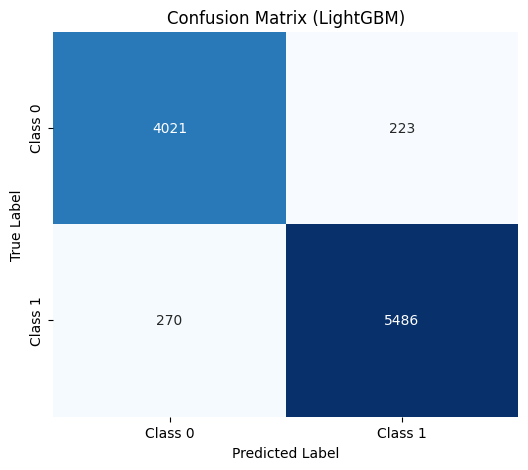

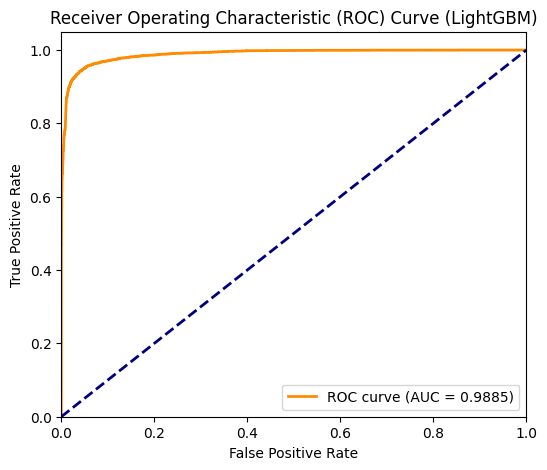

In [42]:
# =====================================
# VISUALISASI HASIL EVALUASI (LightGBM)
# =====================================
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

if 'y_test_pred' in locals() and 'y_test_proba' in locals() and 'y_test' in locals():
    print("\nGenerating confusion matrix and ROC curve for the LightGBM model...")

    # --- Confusion Matrix ---
    cm_lgbm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (LightGBM)')
    plt.show()

    # --- ROC Curve and AUC ---
    fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_test_proba)
    roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lgbm:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (LightGBM)')
    plt.legend(loc="lower right")
    plt.show()

else:
    print("❗ Could not generate visualizations. Ensure 'y_test_pred', 'y_test_proba', and 'y_test' are available from the previous cell.")

Preparing feature importance plot (top 50 features)...


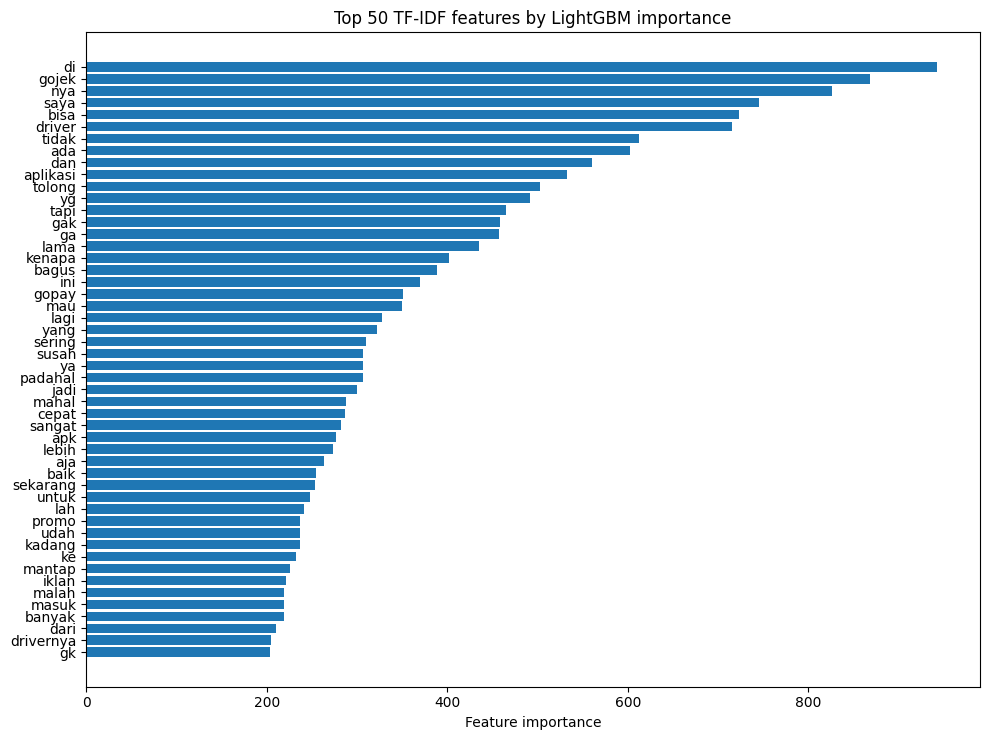

Saved feature importance plot to /content/lgbm_pipeline_output/feature_importance_top50.png

Pipeline finished. Files saved to: /content/lgbm_pipeline_output


In [ ]:
print("Preparing feature importance plot (top {} features)...".format(TOP_K_FEATURES))
try:
    importances = final_clf.feature_importances_
    feature_names = np.array(final_vectorizer.get_feature_names_out())
    top_idx = np.argsort(importances)[-TOP_K_FEATURES:][::-1]
    top_feats = feature_names[top_idx]
    top_imps = importances[top_idx]

    plt.figure(figsize=(10, max(6, TOP_K_FEATURES*0.15)))
    y_pos = np.arange(len(top_feats))
    plt.barh(y_pos, top_imps[::-1])
    plt.yticks(y_pos, top_feats[::-1])
    plt.xlabel("Feature importance")
    plt.title("Top {} TF-IDF features by LightGBM importance".format(TOP_K_FEATURES))
    plt.tight_layout()
    fig_path = os.path.join(OUTPUT_DIR, f"feature_importance_top{TOP_K_FEATURES}.png")
    plt.savefig(fig_path, dpi=200)
    plt.show()
    print("Saved feature importance plot to", fig_path)
except Exception as e:
    print("Could not compute feature importance:", e)

print("\nPipeline finished. Files saved to:", OUTPUT_DIR)